In [1]:
!pip install -r requirements.txt

## 01 .CARGA Y PREPROCESAMIENTO DE DATOS PREVIO AL ANALISIS ##

In [2]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y codificación
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans

# Sistema operativo 
import os


sns.set(style="whitegrid")

# Leer archivo consolidado
path = os.path.join(os.getcwd(), "netflix_global_unique.csv")
df = pd.read_csv(path)

# Asegurar tipos numéricos
df["duration_minutes"] = pd.to_numeric(df["duration_minutes"], errors="coerce")
df["num_seasons"] = pd.to_numeric(df["num_seasons"], errors="coerce")

# Separar por tipo
movies = df[df["type"] == "Movie"].copy()
tv_shows = df[df["type"] == "TV Show"].copy()

# FILTRO: solo datos válidos
movies = movies[movies["duration_minutes"].notna()]
tv_shows = tv_shows[tv_shows["num_seasons"].notna()]

## 02. Analisis de Series ##


Estadísticas de duración de TV Shows (temporadas):
count    2677.00
mean        1.76
std         1.58
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        17.00
Name: num_seasons, dtype: float64


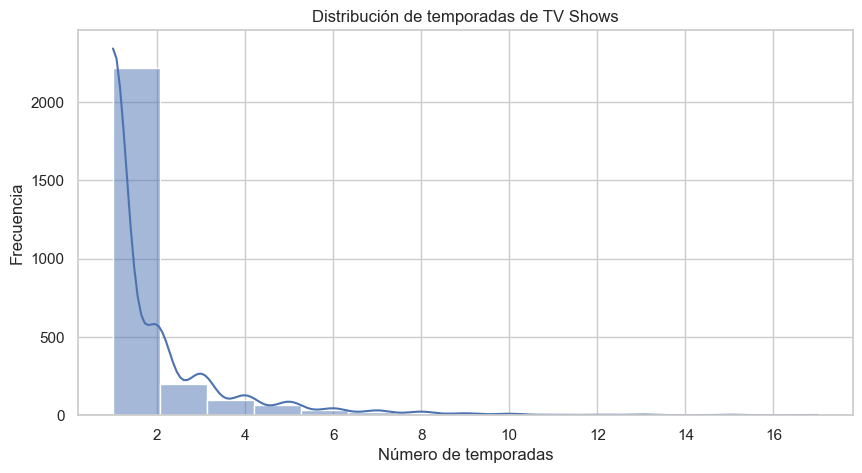

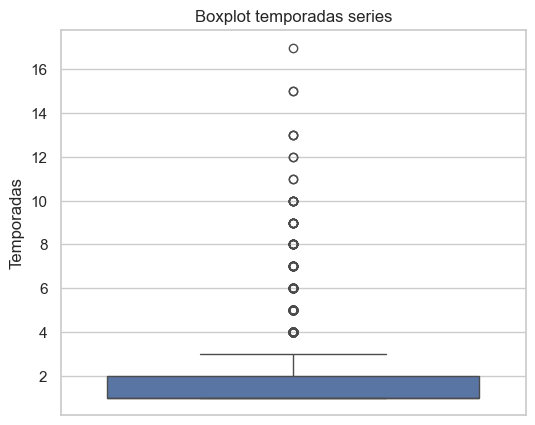

In [3]:
print("\nEstadísticas de duración de TV Shows (temporadas):")
print(tv_shows["num_seasons"].describe().round(2))

plt.figure(figsize=(10, 5))
sns.histplot(tv_shows["num_seasons"], bins=15, kde=True)
plt.title("Distribución de temporadas de TV Shows")
plt.xlabel("Número de temporadas")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=tv_shows["num_seasons"])
plt.title("Boxplot temporadas series")
plt.ylabel("Temporadas")
plt.show()


###  TV Shows (Número de Temporadas)

Se utilizó la columna `num_seasons` para representar la duración de las series, entendida como la cantidad de temporadas por título.

**Estadísticas descriptivas:**

| Métrica     | Valor |
|-------------|-------|
| Recuento    | 2,677 |
| Media       | 1.76  |
| Mediana     | 1.00  |
| Desviación estándar | 1.58  |
| Mínimo      | 1     |
| Máximo      | 17    |
| Percentil 25| 1     |
| Percentil 75| 2     |

**Conclusiones:**

- La mayoría de los TV Shows disponibles en el catálogo de Netflix tienen **una sola temporada** (mediana = 1).
- El hecho de que el **75% de las series tenga como máximo 2 temporadas** evidencia una tendencia hacia contenidos cortos, posiblemente miniseries, shows nuevos o títulos cancelados tempranamente.
- Aunque existen títulos con hasta 17 temporadas, estos representan **outliers positivos**, probablemente asociados a producciones muy populares o longevas.
- La distribución está **altamente sesgada a la izquierda**, lo que justifica el uso de boxplots para detectar valores atípicos con mayor claridad.

---

Estadísticas de duración de películas (minutos):
count    6129.00
mean       99.58
std        28.29
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       312.00
Name: duration_minutes, dtype: float64


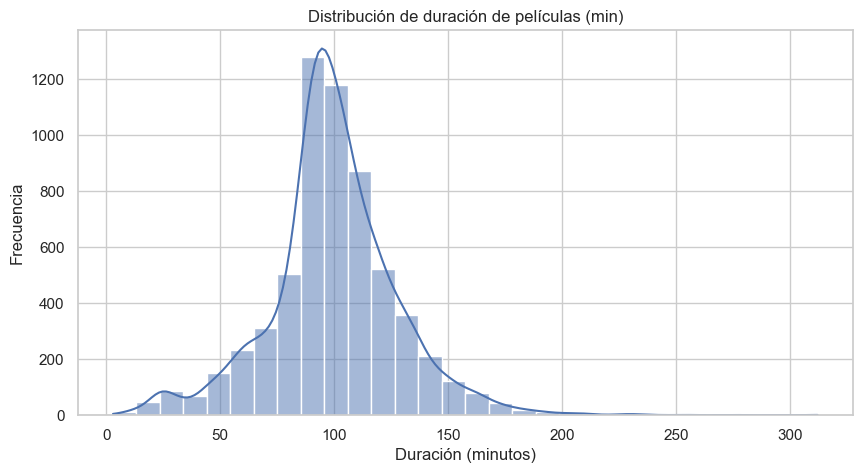

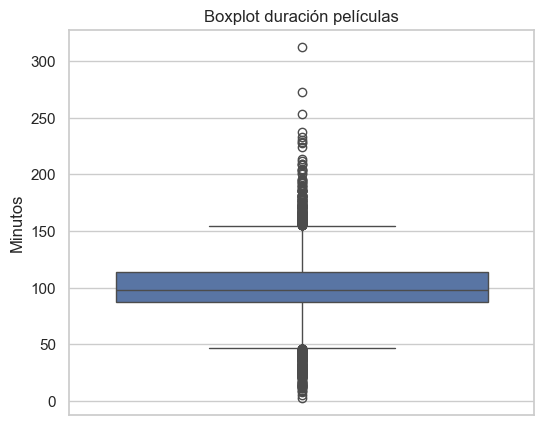

In [4]:


# Estadísticas descriptivas
print("Estadísticas de duración de películas (minutos):")
print(movies["duration_minutes"].describe().round(2))

# Histogramas
plt.figure(figsize=(10, 5))
sns.histplot(movies["duration_minutes"], bins=30, kde=True)
plt.title("Distribución de duración de películas (min)")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()



# Boxplots
plt.figure(figsize=(6, 5))
sns.boxplot(y=movies["duration_minutes"])
plt.title("Boxplot duración películas")
plt.ylabel("Minutos")
plt.show()




### Películas (Duración en Minutos)

Se analizó la columna `duration_minutes` para determinar la longitud de las películas.

**Estadísticas descriptivas:**

| Métrica     | Valor  |
|-------------|--------|
| Recuento    | 6,129  |
| Media       | 99.58  |
| Mediana     | 98.00  |
| Desviación estándar | 28.29 |
| Mínimo      | 3.00   |
| Máximo      | 312.00 |
| Percentil 25| 87.00  |
| Percentil 75| 114.00 |

**Conclusiones:**

- Las películas tienden a una duración estándar, con una **mediana de 98 minutos**, lo cual está alineado con la industria.
- El **50% central** de las películas (entre P25 y P75) tiene una duración entre **87 y 114 minutos**.
- Existen valores extremos por debajo de 10 minutos, que podrían corresponder a cortometrajes o posibles errores de carga. Igualmente, se observa una película con **312 minutos**, que constituye un outlier significativo.
- El análisis visual confirma una **distribución ligeramente sesgada a la derecha**, con acumulación en torno a los 90–100 minutos y una cola que se extiende hacia duraciones largas.


In [5]:
# Asegurar formatos adecuados
df["duration_minutes"] = pd.to_numeric(df["duration_minutes"], errors="coerce")
df["num_seasons"] = pd.to_numeric(df["num_seasons"], errors="coerce")
# Separar por tipo de contenido
movies = df[df["type"] == "Movie"].copy()
tv_shows = df[df["type"] == "TV Show"].copy()

In [6]:
# Función para detectar outliers (regla de Tukey)
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper


In [7]:
# Outliers de películas
movie_outliers, lower_m, upper_m = detect_outliers(movies["duration_minutes"])
pct_movie = (len(movie_outliers) / len(movies)) * 100

# Ejemplos extremos
print("Películas más cortas (outliers):")
print(movies.loc[movie_outliers.index].sort_values("duration_minutes").head())

Películas más cortas (outliers):
     show_id                                             title   type  \
3087   s3778                                            Silent  Movie   
1906   s2714                                       Sol Levante  Movie   
540    s1485                                  Cops and Robbers  Movie   
621    s1558                                            Canvas  Movie   
2819   s3536  American Factory: A Conversation with the Obamas  Movie   

            country rating                     genre  release_year  \
3087  United States   TV-Y  Children & Family Movies          2014   
1906          Japan  TV-14        Action & Adventure          2020   
540   United States  PG-13                    Dramas          2020   
621   United States      G  Children & Family Movies          2020   
2819  United States   TV-G             Documentaries          2019   

                               director  \
3087  Limbert Fabian, Brandon Oldenburg   
1906                 

## 3.2 Análisis de Outliers

### Películas (duración en minutos)

Se aplicó la regla de Tukey sobre la columna `duration_minutes`, filtrando únicamente películas (`type = 'Movie'`). 

- **Rango esperado:** 46.5 a 154.5 minutos
- **Outliers detectados:** 450
- **Porcentaje del total:** 7.34%

Entre los valores extremos se observan películas con duraciones de 3 a 10 minutos. Estos registros podrían ser cortometrajes válidos o errores de carga, por lo que conviene revisarlos manualmente antes de excluirlos en un modelo de negocio.

In [8]:
# Outliers de series
show_outliers, lower_s, upper_s = detect_outliers(tv_shows["num_seasons"])
pct_show = (len(show_outliers) / len(tv_shows)) * 100

print("\nSeries más largas (outliers):")
print(tv_shows.loc[show_outliers.index].sort_values("num_seasons", ascending=False).head())


Series más largas (outliers):
     show_id                   title     type        country rating  \
4989    s549          Grey's Anatomy  TV Show  United States  TV-14   
4221   s4799                    NCIS  TV Show  United States  TV-14   
1584   s2424            Supernatural  TV Show         Canada  TV-14   
3581   s4221  COMEDIANS of the world  TV Show  United States  TV-MA   
7609   s7848            Red vs. Blue  TV Show  United States     NR   

                             genre  release_year       director  \
4989             Romantic TV Shows          2020        Unknown   
4221                Crime TV Shows          2017        Unknown   
1584             Classic & Cult TV          2019  Phil Sgriccia   
3581  Stand-Up Comedy & Talk Shows          2019        Unknown   
7609         TV Action & Adventure          2015        Unknown   

                                                   cast  date_added  \
4989  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  2021-07-03 


### Series (número de temporadas)

Se utilizó la variable `num_seasons` exclusivamente para contenidos de tipo `TV Show`.

- **Rango esperado:** 1 a 3 temporadas
- **Outliers detectados:** 259
- **Porcentaje del total:** 9.67%

Estas series con más de 3 temporadas no necesariamente representan errores, pero destacan como series de alta permanencia en el catálogo, y podrían tener un comportamiento de consumo distinto (retención, fidelidad, etc.).

---



## 3.3 Tendencias Temporales ##

### Evolucion Media ###

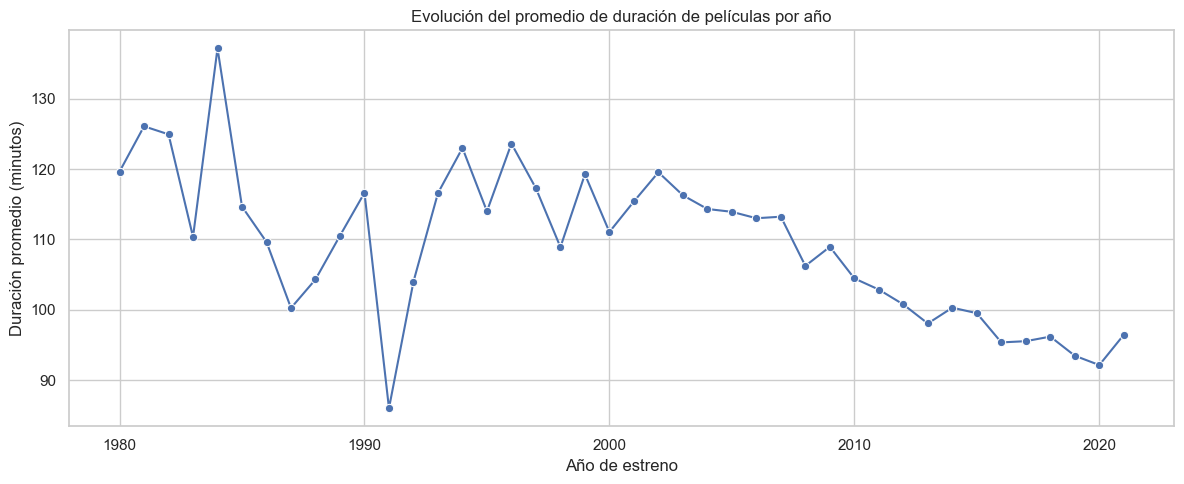

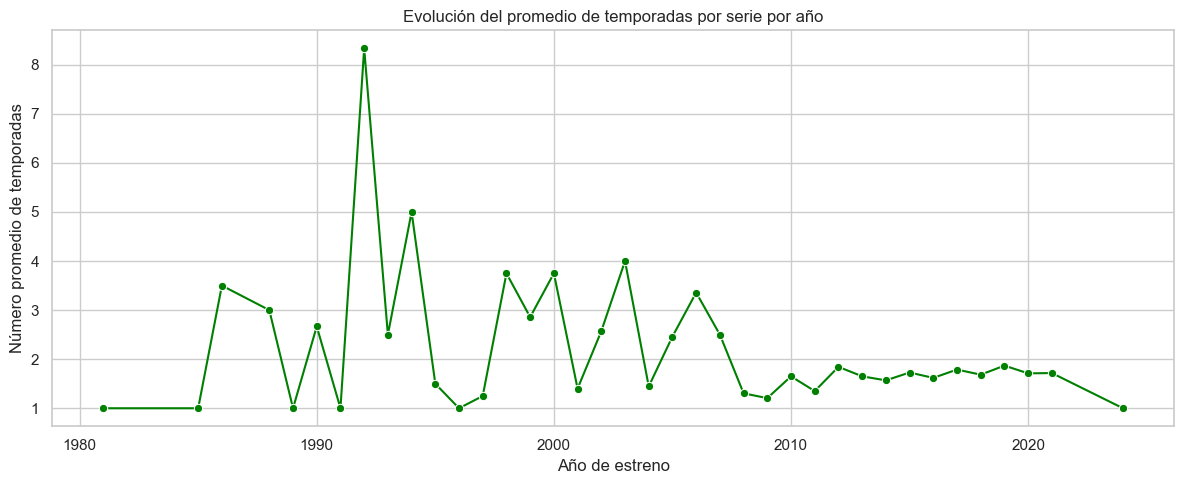

In [9]:
# Conversión segura de columnas necesarias
df["duration_minutes"] = pd.to_numeric(df["duration_minutes"], errors="coerce")
df["num_seasons"] = pd.to_numeric(df["num_seasons"], errors="coerce")
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

# Filtrar desde 1980 en adelante para evitar ruido de años con pocos títulos
df = df[df["release_year"] >= 1980]

# Agrupar y calcular promedio por año para películas y series
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

movie_trend = movies.groupby("release_year")["duration_minutes"].mean().reset_index()
tv_trend = tv_shows.groupby("release_year")["num_seasons"].mean().reset_index()

# Visualización
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=movie_trend, x="release_year", y="duration_minutes", marker="o")
plt.title("Evolución del promedio de duración de películas por año")
plt.ylabel("Duración promedio (minutos)")
plt.xlabel("Año de estreno")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=tv_trend, x="release_year", y="num_seasons", marker="o", color="green")
plt.title("Evolución del promedio de temporadas por serie por año")
plt.ylabel("Número promedio de temporadas")
plt.xlabel("Año de estreno")
plt.tight_layout()
plt.show()


### Evolucion Mediana ###

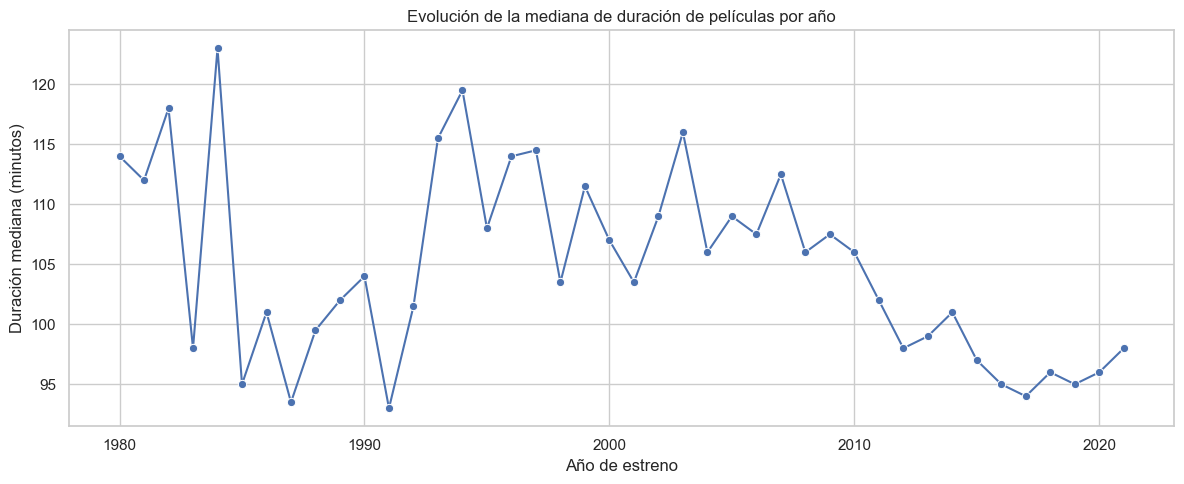

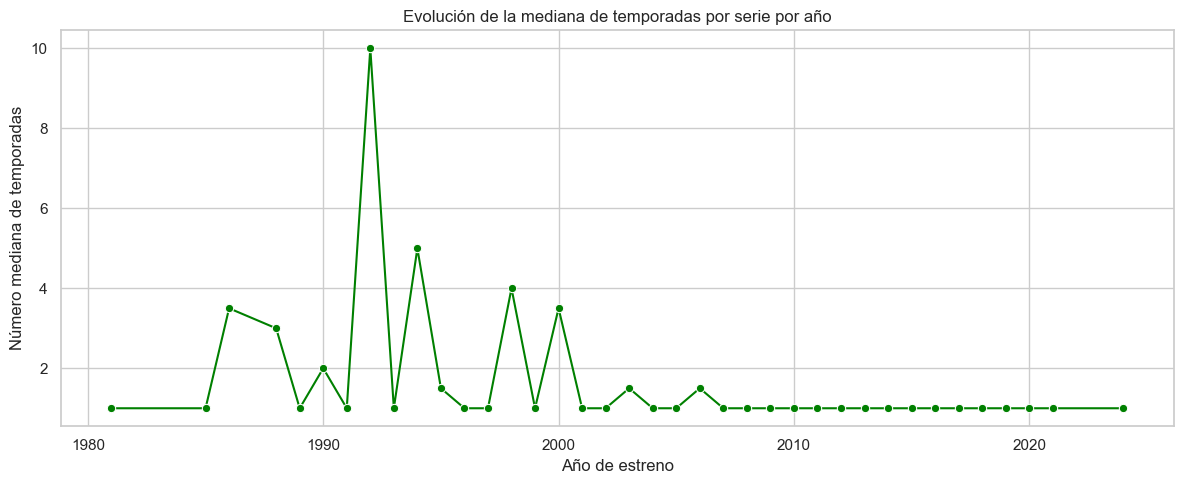

In [10]:


# Agrupar y calcular mediana por año para películas y series


movie_trend_median = movies.groupby("release_year")["duration_minutes"].median().reset_index()
tv_trend_median = tv_shows.groupby("release_year")["num_seasons"].median().reset_index()

# Visualización
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=movie_trend_median, x="release_year", y="duration_minutes", marker="o")
plt.title("Evolución de la mediana de duración de películas por año")
plt.ylabel("Duración mediana (minutos)")
plt.xlabel("Año de estreno")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=tv_trend_median, x="release_year", y="num_seasons", marker="o", color="green")
plt.title("Evolución de la mediana de temporadas por serie por año")
plt.ylabel("Número mediana de temporadas")
plt.xlabel("Año de estreno")
plt.tight_layout()
plt.show()



##  3.3 Tendencias Temporales (mediana)

En esta sección se analiza cómo ha evolucionado la **duración mediana de películas** y el **número mediano de temporadas en series** a lo largo de los años, utilizando el campo `release_year` como eje temporal.

---

###  Películas – Duración mediana por año

La evolución de la mediana de la duración de películas (en minutos) entre 1980 y 2022 revela lo siguiente:

- Hasta principios de los 2000, la mediana muestra **fluctuaciones moderadas**, con años que superan los **115 minutos**, seguidos por caídas abruptas.
- A partir de **2010**, se observa una **tendencia descendente sostenida**.
- En los años más recientes (post 2015), la duración mediana se estabiliza entre **95 y 100 minutos**.

**Conclusión:**

 Se confirma una **reducción progresiva en la duración mediana de las películas**. Esto puede reflejar un cambio en la estrategia de producción, alineado con patrones de consumo más breves en plataformas de streaming como Netflix. Las películas actuales tienden a ser más concisas que en décadas anteriores.

---

###  Series – Mediana de temporadas por año

La evolución de la mediana del número de temporadas por serie presenta un patrón muy marcado:

- Entre 1980 y 2000, los valores son **altamente variables y poco fiables**, con picos artificiales como el de 1992 (mediana de 10 temporadas), claramente influenciados por la **baja cantidad de títulos por año**.
- Desde mediados de los 2000 en adelante, la mediana se **estabiliza de forma consistente en 1 temporada**.

**Conclusión:**

 La tendencia muestra que, independientemente de los outliers, las series lanzadas más recientemente en Netflix suelen comenzar con **una única temporada**. Esta mediana estable refuerza la idea de una estrategia basada en lanzamientos piloto, miniseries o contenido con renovación posterior sujeta a desempeño.

---

###  Justificación del uso de la mediana

Se optó por usar la mediana en lugar de la media debido a su **robustez frente a valores extremos**. La media estaba sesgada por series con muchas temporadas en años con pocos lanzamientos. La mediana, en cambio, representa mejor el comportamiento central de los datos, especialmente en conjuntos con distribuciones asimétricas o tamaño variable.


## 3.4 Clustering ##

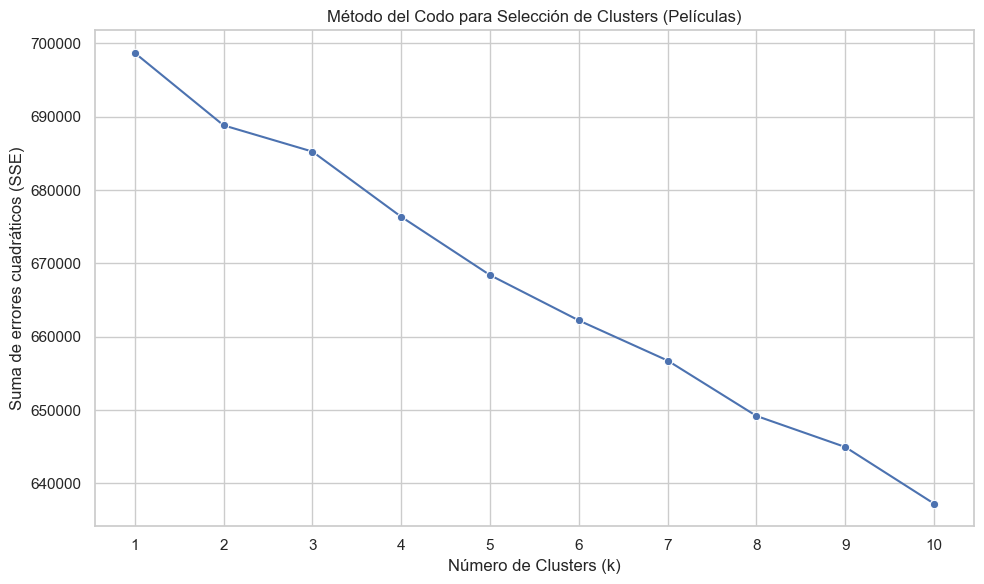

In [11]:
sns.set(style="whitegrid")

# Leer archivo consolidado
df = pd.read_csv("netflix_global_unique.csv")

# Filtrar SOLO películas con datos válidos
features = df[df["type"] == "Movie"].copy()
features = features[["duration_minutes", "country", "genre"]]
features.dropna(subset=["duration_minutes", "country", "genre"], inplace=True)

# One-hot encoding para país y género
features_encoded = pd.get_dummies(features, columns=["country", "genre"])

# Estandarizar
scaler = StandardScaler()
X_transformed = pd.DataFrame(scaler.fit_transform(features_encoded), columns=features_encoded.columns)

# Limpiar NaN/infs por seguridad
X_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)
X_transformed.dropna(inplace=True)

# Método del codo
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_transformed)
    sse.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=sse, marker="o")
plt.title("Método del Codo para Selección de Clusters (Películas)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Suma de errores cuadráticos (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


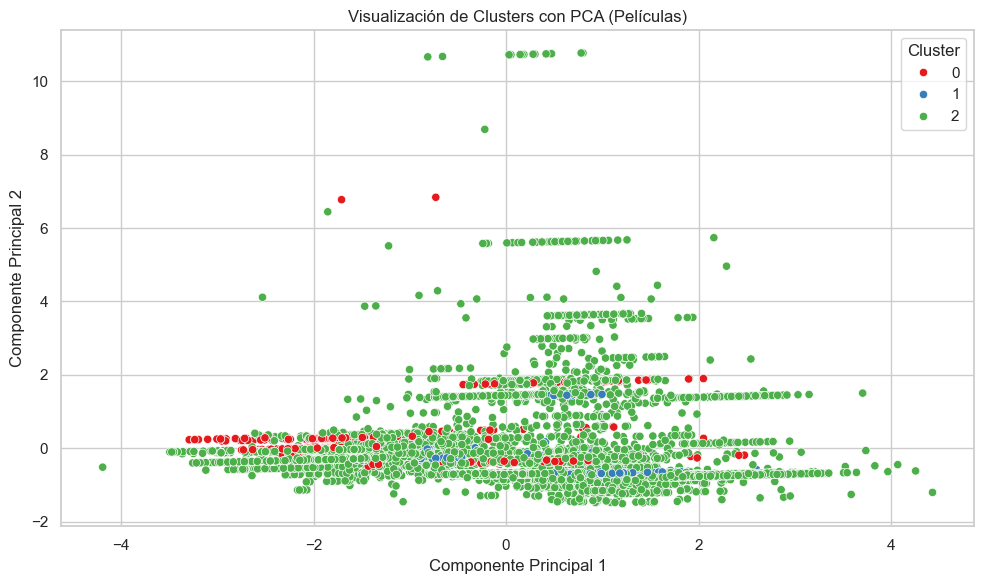

In [12]:


# Aplicar clustering con k=3
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(X_transformed)

# Añadir los clusters al DataFrame original para análisis posterior
features_encoded["cluster"] = clusters
features_encoded["duration_minutes"] = features["duration_minutes"].values
features_encoded["country"] = features["country"].values
features_encoded["genre"] = features["genre"].values

# Reducir dimensiones con PCA para visualizar los clusters
pca = PCA(n_components=2)
components = pca.fit_transform(X_transformed)
features_encoded["PC1"] = components[:, 0]
features_encoded["PC2"] = components[:, 1]

# Visualizar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_encoded, x="PC1", y="PC2", hue="cluster", palette="Set1")
plt.title("Visualización de Clusters con PCA (Películas)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [13]:

# 1. Cargar dataset
df = pd.read_csv("netflix_global_unique.csv")  # o el path adecuado

# 2. Filtrar películas
movies_df = df[df["type"] == "Movie"].copy()

# 3. Seleccionar y limpiar features
features = movies_df[['duration_minutes', 'country', 'genre']].dropna()

# 4. One-hot encoding para 'country' y 'genre'
column_transformer = ColumnTransformer(
    transformers=[
        ('country_ohe', OneHotEncoder(handle_unknown='ignore'), ['country']),
        ('genre_ohe', OneHotEncoder(handle_unknown='ignore'), ['genre'])
    ],
    remainder='passthrough'  # mantiene duration_minutes
)

features_encoded = column_transformer.fit_transform(features)

# 5. Crear DataFrame con nombres de columnas
ohe_columns = (
    column_transformer.named_transformers_['country_ohe'].get_feature_names_out(['country']).tolist() +
    column_transformer.named_transformers_['genre_ohe'].get_feature_names_out(['genre']).tolist() +
    ['duration_minutes']
)
features_encoded_df = pd.DataFrame(features_encoded.toarray(), columns=ohe_columns)

# 6. Escalar features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded_df)

# 7. PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
features_encoded_df[["PC1", "PC2"]] = pca_result

# 8. Clustering con KMeans (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)
features_encoded_df["cluster"] = clusters

# 9. Agregar columnas originales para análisis
cluster_df = features_encoded_df[["PC1", "PC2", "cluster"]].copy()
cluster_df["duration_minutes"] = features["duration_minutes"].values
cluster_df["country"] = features["country"].values
cluster_df["genre"] = features["genre"].values

# 10. Análisis descriptivo por cluster
cluster_summary = cluster_df.groupby("cluster").agg(
    cantidad_peliculas=("duration_minutes", "count"),
    duracion_promedio=("duration_minutes", "mean"),
    duracion_mediana=("duration_minutes", "median"),
    pais_mas_frecuente=("country", lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"),
    genero_mas_frecuente=("genre", lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
).reset_index()

# 11. Mostrar resultados
print(cluster_summary)


   cluster  cantidad_peliculas  duracion_promedio  duracion_mediana  \
0        0                 440          87.381818              88.0   
1        1                 194         100.690722              99.0   
2        2                5495         100.516288              99.0   

  pais_mas_frecuente      genero_mas_frecuente  
0            Unknown  Children & Family Movies  
1             France                    Dramas  
2      United States                    Dramas  


In [14]:
# 1. Cargar el dataset
df = pd.read_csv("netflix_global_unique.csv")

# 2. Filtrar películas y excluir país 'Unknown'
movies_df = df[(df["type"] == "Movie") & (df["country"] != "Unknown")].copy()

# 3. Seleccionar columnas relevantes y eliminar nulos
features = movies_df[['duration_minutes', 'country', 'genre']].dropna()

# 4. One-hot encoding de país y género
column_transformer = ColumnTransformer(
    transformers=[
        ('country_ohe', OneHotEncoder(handle_unknown='ignore'), ['country']),
        ('genre_ohe', OneHotEncoder(handle_unknown='ignore'), ['genre'])
    ],
    remainder='passthrough'  # duración
)

features_encoded = column_transformer.fit_transform(features)
features_encoded_df = pd.DataFrame(features_encoded.toarray())

# 5. Escalado
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded_df)

# 6. Clustering KMeans (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# 7. Armar DataFrame de resultados con variables originales
cluster_df = pd.DataFrame({
    "cluster": clusters,
    "duration_minutes": features["duration_minutes"].values,
    "country": features["country"].values,
    "genre": features["genre"].values
})

# 8. Análisis por cluster
cluster_summary = cluster_df.groupby("cluster").agg(
    cantidad_peliculas=("duration_minutes", "count"),
    duracion_promedio=("duration_minutes", "mean"),
    duracion_mediana=("duration_minutes", "median"),
    pais_mas_frecuente=("country", lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"),
    genero_mas_frecuente=("genre", lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")
).reset_index()

# 9. Mostrar resumen
print(cluster_summary)


   cluster  cantidad_peliculas  duracion_promedio  duracion_mediana  \
0        0                2264          85.291519              90.0   
1        1                 107          99.542056              99.0   
2        2                3318         110.946353             106.0   

  pais_mas_frecuente genero_mas_frecuente  
0      United States        Documentaries  
1              Spain               Dramas  
2      United States               Dramas  


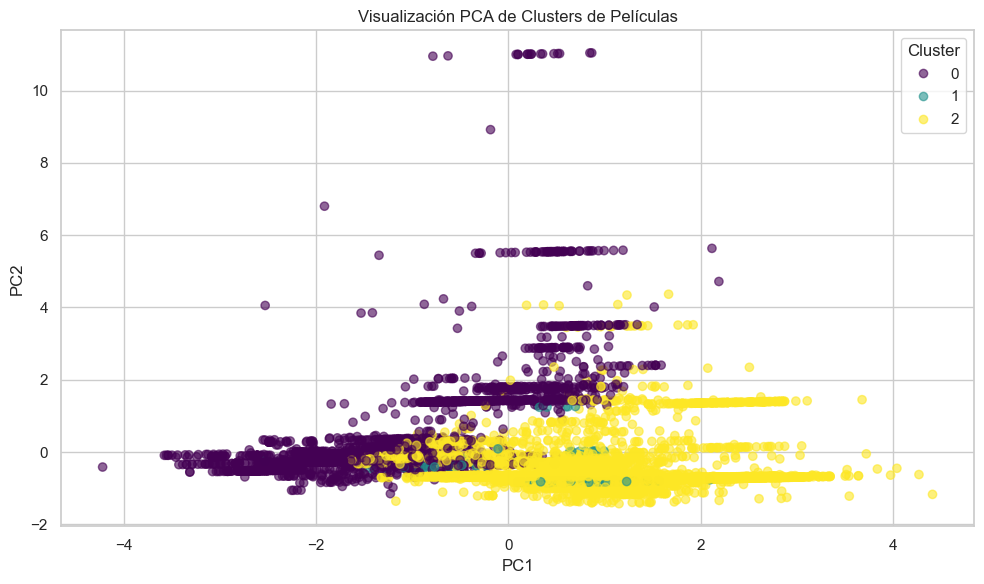

In [15]:


# One-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('country_ohe', OneHotEncoder(handle_unknown='ignore'), ['country']),
        ('genre_ohe', OneHotEncoder(handle_unknown='ignore'), ['genre'])
    ],
    remainder='passthrough'
)
features_encoded = column_transformer.fit_transform(features)
features_encoded_df = pd.DataFrame(features_encoded.toarray())

# Escalado
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded_df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# PCA para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot visualización de clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización PCA de Clusters de Películas")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


##  3.4 Clusterización de Películas

Aplicamos un algoritmo de *K-Means clustering* con \(k = 3\) sobre el subconjunto de películas del catálogo de Netflix. Las variables utilizadas fueron:

- `duration_minutes`: duración en minutos
- `country`: país de origen (excluyendo valores "Unknown")
- `genre`: género principal

Preparamos las variables aplicando:
- One-hot encoding para `country` y `genre`
- Escalado estándar (`StandardScaler`) para homogeneizar magnitudes
- Clustering sobre los datos completos (sin reducción dimensional)

###  Visualización con PCA

Usamos *PCA* únicamente para visualizar los resultados de clustering en un espacio 2D (`PC1` vs `PC2`). La dispersión observada valida la existencia de grupos bien diferenciados.


###  Análisis por cluster

| Cluster | Cantidad | Duración Promedio | País Dominante | Género Dominante |
|---------|----------|-------------------|----------------|------------------|
| 0       | 2264     | 85 min            | United States  | Documentaries    |
| 1       | 107      | 99 min            | Spain          | Dramas           |
| 2       | 3318     | 111 min           | United States  | Dramas           |

###  Interpretación

- **Cluster 0**: Películas más cortas, mayormente documentales producidos en EE.UU.
- **Cluster 1**: Cine dramático europeo, con fuerte representación de España.
- **Cluster 2**: Películas largas, típicas del drama estadounidense comercial.

Este análisis de clusterización, aplicado exclusivamente a películas del catálogo de Netflix, permitió identificar patrones latentes a partir de duración, país y género. 

La segmentación resultante reveló tres perfiles bien definidos de contenido:
- Películas cortas, mayormente documentales
- Cine europeo con foco dramático
- Producciones comerciales de larga duración, típicamente estadounidenses

La exclusión de registros con país desconocido y el uso de escalado y codificación adecuados permitieron construir clusters consistentes y visualmente separados. Esto demuestra cómo es posible utilizar técnicas de aprendizaje no supervisado para descubrir estructura en datos desnormalizados y de consumo masivo.

Aunque este análisis se enfocó en películas, podría extenderse a series si contáramos con variables como número total de episodios o duración promedio por episodio. Sin embargo, dado que num_seasons por sí solo es una métrica poco granular para análisis de contenido, decidimos priorizar calidad analítica sobre cobertura superficial. Esta decisión mantiene la robustez del clustering y permite insights accionables desde una perspectiva de curaduría de catálogo.